# **Linear Observers (Linear State Estimators)**
* We modeled a given physical plant using the following general nonlinear system and measurement equations.

\begin{equation} \begin{array}{c}
\dot{\mathbf{x}} = f(\mathbf{x},\mathbf{u},\mathbf{w})\\
\mathbf{y} = g(\mathbf{x},\boldsymbol{\nu})
\end{array}\end{equation}

*  Here we first consider the deterministic linear time invariant (LTI) case for develeopment.

\begin{equation} \begin{array}{c}
\dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{u} \\
\mathbf{y} = C\mathbf{x}
\end{array}\end{equation}


*  For LTI models we developed a general solution for tracking and stabilization control problems when using a state feedback controller with stabilizing gains, i.e, $\bf u= -K_c(x-x_{ref}) + u_{ref}$

* LQR controllers allowed us to find the controller gains using an optimality criteria both for stabilizing and tracking cases.

* For any state feedback type controller we need to knwo the current state $\bf x$ of the system.

* However, the state of a system is not directly measured. Instead we have to make use of the measurements $\bf y$ and inputs $\bf u$ to get a best estimate of the state using an **observer**.
* Hence the objective of an observer is to find the best **estimate** of $\bf x:= \hat{x}$ using all available known information at hand ( the mathematical model, parameters, the applied inputs, and measured outputs)
* The process is also termed as **state estimation**.
<!-- * Finite horizon LQR formulations allowed to address the tracking problem and extending the method to nonlinear application through the use of linearized system models. -->



# **Error state model and stability**

* Generally, the tracking controller problem that we covered in the previous topic focuses on the tracking error model of a system, and attempts to stabilizes the tracking error model using a controller:

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1OSd2KIfJockV__wLb3Tng20F94_KIT2x"
    width="400"/>
</div></center>

* The observer problem instead focuses on the error state model of a system, and attempts to stabilize the error state:

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1SSCFea34-3Agp-lWzUYzmsmN0t6sbstZ"
    width="300"/>
</div></center>
$$\begin{array}[c c] t\dot{\tilde{\mathbf{x}}} &= A\tilde{\mathbf{x}}\\
  \tilde{\mathbf{y}} &= C\tilde{\mathbf{x}}
  \end{array} $$

* As covered in the previous section the system defined by $A$ when considering no input is asymptotically stable if all poles are located in the right half of the s plane.

$$real(Eig(A))<0$$





# **Observability and Detectabilty**

* A system is said to be **observable** at time $t_0$ if it is possible to determine the system state $x(t_0)$ from the observation of the output $y$ over a finite time interval. For full state observability the observability matrix should be of rank $n$,where $n$ is the number of states.

* The row vectors of the observability matrix spans the observable space of the system, i.e, indicates the observable directions (**observable modes**) of a system.

* The **left null space** is defined as the vectors $\mathbf{x}$ that satisfy $\forall \mathbf{x}\neq 0 ~s.t.~ A\mathbf{x}=\mathbf{0}$.

* The left null space of the observability matrix indicates the directions which are unobservable (**unobservable modes**).

* For a system to be **detectable** any unstable mode of the system should be observable and unobservable modes of the system should be stable.



In [ ]:
%%capture
!pip install control
#!pip install underactuated
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from IPython.display import clear_output

# **Example 1 - 1D Inertial navigation**

Consider 1 dimensional linear motion of an object. The position of the object is denoted by $p$, its velocity is denoted by $v$ and its acceleration is denoted by $a$. An accelerometer attached to the body provides a measurement $f_a$ which measures the acceleration $a$, with a bias of $b_a$ and has a random noise of $\eta_a$. Accelerometer bias is modelled as a random walk process (as shown below).
\begin{equation*}
\begin{array}{l l}
f_a &= a+b_a+\eta_a\\
\dot{b}_a &=0+\eta_{ba}
\end{array}
\end{equation*}
 A position sensor measurement $y_p$ provides the position of the object $p$ corrupted by a noise term $\eta_p$.
 \begin{equation*}
y_p = p+\eta_p
\end{equation*}




### **Example 1a)**
Generate the state space model for this system in the following form.
 \begin{equation}
 \begin{array}{l l}
\dot{\mathbf{x}} &=\mathbf{A}\mathbf{x}+\mathbf{B}\mathbf{u} + \mathbf{G}_\nu \mathbf{w}\\
\mathbf{y}         &=\mathbf{Cx} + \boldsymbol{\nu}
\end{array}
\end{equation}
Consider the accelerometer measurement as an input ($u=f_a$), the position sensor as an output ($y=y_p$), and select the state vector as $\mathbf{x}=[p~ v ~b_a]^T$.

### **Example 1b)**
Comment on the observability and the detectability of the above system.



In [ ]:
# The state space model
A= np.array([[0, 1, 0],[0, 0, -1],[0, 0, 0]])
B= np.array([[0], [1], [0]]);
C= np.array([[1,0,0]]);
D= np.array([[0], [0],[0]]);
Gw= np.array([[0, 0],[-1, 0],[0, 1]])

Obsv =ct.obsv(A,C)
print(Obsv)

print('Rank of Observability matrix:',np.linalg.matrix_rank(Obsv))

eigenvalues, eigenvectors = np.linalg.eig(A)
print('Eigen values of A matrix:',eigenvalues)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
Rank of Observability matrix: 3
Eigen values of A matrix: [0. 0. 0.]


* The observability of the system indicates which modes of the error state can be driven to zero. In this case all states are observable. i.e., all error states can be driven to zero.
* A system is detectable if unobservable modes of the error state are stable. There are 0 unobservable modes for the above system. Hence the above system is detectable.

### **Example 1c)**
Taking the sampling time as $dt=0.01s$, discretize the system in example 1 to derive the following form:
 \begin{equation*}
 \begin{array}{l l}
\mathbf{x}_{k+1} &=\mathbf{A_k}\mathbf{x}_k+\mathbf{B_k}\mathbf{u}_k\\
\mathbf{y} _k        &=\mathbf{C_kx}_k
\end{array}
\end{equation*}

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1HuQjVd18A5A_01P9dFkGT57u8tWxm3EN"
    width="400"/>
</div></center>

In [ ]:
from scipy.linalg import expm
dt = 0.01
Phi = expm(np.block([[A, B], [np.zeros([B.shape[1],A.shape[1]+B.shape[1]])]])*dt)
Ak  = Phi[0:A.shape[0],0:A.shape[1]]
Bk  = Phi[0:A.shape[1],A.shape[1]:A.shape[1]+B.shape[0]]
Ck = C
print(Ak,Bk,Ck)

[[ 1.e+00  1.e-02 -5.e-05]
 [ 0.e+00  1.e+00 -1.e-02]
 [ 0.e+00  0.e+00  1.e+00]] [[5.e-05]
 [1.e-02]
 [0.e+00]] [[1 0 0]]


In [ ]:
# An approximation of the matrix exponential

Ak = np.eye(A.shape[0]) + A*dt + 0.5*dt**2*A@A
Bk = B*dt + 0.5*dt**2*A@B
Gk = Gw*dt + 0.5*dt**2*A@Gw
Ck = C
print(Ak,Bk,Ck,Gk)

[[ 1.e+00  1.e-02 -5.e-05]
 [ 0.e+00  1.e+00 -1.e-02]
 [ 0.e+00  0.e+00  1.e+00]] [[5.e-05]
 [1.e-02]
 [0.e+00]] [[1 0 0]] [[-5.e-05  0.e+00]
 [-1.e-02 -5.e-05]
 [ 0.e+00  1.e-02]]


# **Luenberger Observer**


* The Luenberger observer for a system is defined as follows:

\begin{equation} \begin{array}{c}
\dot{\hat{\mathbf{x}}} = A\hat{\mathbf{x}} + B\mathbf{u} + L(\mathbf{y}-\hat{\mathbf{y}})\\
\hat{\mathbf{y}}=C\hat{\mathbf{x}}.
\end{array}\end{equation}

* In the above equation $\hat{\mathbf{x}}$ denotes the estimated state, $\hat{\mathbf{y}}$ denotes the estimated measurement, and $L$ denotes the Observer gain.


<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=10Gg-MkBFN5YgP9W_4nU82SLGgKsSftmO"
    width="440"/>
</div></center>



* The design of observer gain $L$ is performed using the error state $\tilde{\mathbf{x}}$ dynamics of the system.
* The error state is defined as $\tilde{\mathbf{x}}=\mathbf{x}-\hat{\mathbf{x}}$ and its dynamics is defined as

\begin{equation} \begin{array}{c l}
\require{cancel}
\dot{\tilde{\mathbf{x}}} &= A\mathbf{x} + \cancel{B\mathbf{u}} - A\hat{\mathbf{x}} - \cancel{B\mathbf{u}} - L(\mathbf{y}-\hat{\mathbf{y}})\\
\dot{\tilde{\mathbf{x}}} &= (A-LC)\tilde{\mathbf{x}}
\end{array}\end{equation}


### **Example 1d)**

A linear state observer for the above system takes the form
 \begin{equation}
 \begin{array}{l l}
\mathbf{\hat{x}}_{k+1} &=\mathbf{A_k}\mathbf{\hat{x}}_k+\mathbf{B_k}\mathbf{u}_k + \mathbf{L }(\mathbf{y} _k-\mathbf{\hat{y}} _k)\\
\mathbf{\hat{y}} _k        &=\mathbf{C_k\hat{x}}_k
\end{array}
\end{equation}
where $\hat{\mathbf{x}}$ is used to denote the estimate of a variable $\mathbf{x}$. Taking the error state as $ \tilde{\mathbf{x}}= \mathbf{x}-\hat{\mathbf{x}}$, generate the equation for error state dynamics $\mathbf{\tilde{x}_{k+1}}$ for this system. What are the necessary conditions for this error state system to be asymptotically stable?


<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1H_8WDqChB_hdKRBOLi6jBVlOZM9qyj4P"
    width="440"/>
</div></center>


### **Example 1e)**

Find the observer gains $\mathbf{L}=[k_1~k_2~k_3]^T$ such that the poles of the error state dynamic system are placed at $(0.8+0.1i~,0.8-0.1i,~ 0.5)$.



[[   0.9    23.75 -250.  ]]
Eigen values of A-LC matrix: [0.5+0.j  0.8+0.1j 0.8-0.1j]


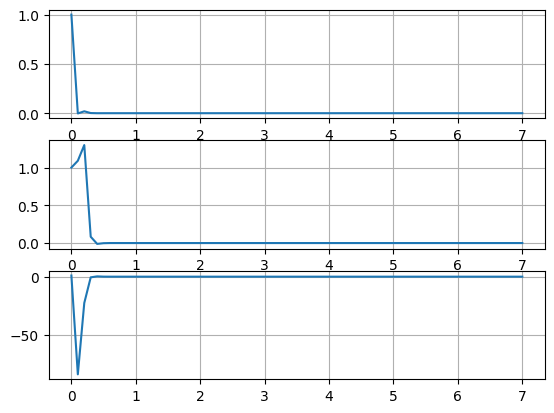

In [ ]:
L=ct.place(Ak.T,Ck.T,[0.8+.1j, 0.8-.1j, 0.5])
print(L)

eigenvalues, eigenvectors = np.linalg.eig(Ak-L.T@Ck)
print('Eigen values of A-LC matrix:',eigenvalues)

sys = ct.ss(Ak-L.T@Ck,[[0],[0],[0]],np.eye(3),0,dt)
T, yout =ct.initial_response(sys,np.linspace(0.0, 7.0, num=71),1)
fig, axs = plt.subplots(3, 1)
axs[0].grid()
axs[0].plot(T,yout[0]);
axs[1].plot(T,yout[1]);axs[1].grid()
axs[2].plot(T,yout[2]);axs[2].grid()

# **Linear Quadratic Estimator (LQE)**

* Linear Quadratic Estimator (LQE), also termed the steady state Kalman filter,  uses Q and R martices to find the observer gains using an optimality criteria. This makes it easier to find and tune the stabilizing gains. The following optimization problem is solved.

$$ \dot{\tilde{\mathbf{x}}} = (A_k -L C_k) \tilde{\mathbf{x}}\\ \underset{\mathbf{L}}{\mathrm{argmin}} ~ J = \int_0^\infty \left[ \mathbf{w}^T {\bf Q}  \mathbf{w} +  \mathbf{\nu}^T {\bf R}  \mathbf{\nu} \right] dt \\ \quad {\bf Q} = {\bf Q}^T \succ {\bf 0}, {\bf R} = {\bf R}^T \succeq 0 $$

* Here the variables $w$ and $\nu$ denotes the process and measurementnoises of the LTI model.

\begin{equation} \begin{array}{c}
\dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{u} + \mathbf{w}\\
\mathbf{y} = C\mathbf{x} + \boldsymbol{\nu}\\
\mathbf{w} = G\mathbf{w}'
\end{array}
\end{equation}

* The noise variables are modelled using zero mean Gaussian distribution which are indepndantly and identicaly distributed, i.e., measurement noise and process noise are not corelated to each other (independant).

\begin{equation} \begin{array}{c}
 \mathbf{w} \sim \mathcal{N}(0,Q)\\
\boldsymbol{\nu}\sim \mathcal{N}(0,R)
\end{array}
\end{equation}


* The solution for this problem is well established, and is the optimal observer for the provied linear quadratic cost function with Gaussian noise. The resulting observer is:

where $\bf P$ is the solution to the continous algebric Ricatti equation (CARE) given below:

$$0 = {\bf P} {\bf A} + {\bf A}^T
    {\bf P} - {\bf P} \bf B {\bf R}^{-1} \bf B^T {\bf P} + {\bf Q} $$

* Finding the controller can be easily performed by calling (K,P) = LinearQuadraticEstimator(A,C,Q,R) or similar using a python control package.

### **Example 1f)**

Find the observer gains $\mathbf{L}=[k_1~k_2~k_3]^T$ using a Linear Quadratic Estimator (LQE) for the model in example 1. Assume the noise parameters to be as follows and use teh following initial condition to start the simulation. Generate the state vs trajectory plots ( indicating $2\sigma$ confidence boounds.  


[[ 0.02549433]
 [ 0.03224442]
 [-0.01561111]]
Eigen values of A-LC matrix: [0.99169745+0.01032889j 0.99169745-0.01032889j 0.99111077+0.j        ]
[[ 0.01032908  0.01316677 -0.00640569]
 [ 0.01316677  0.02703095 -0.01622786]
 [-0.00640569 -0.01622786  0.02060479]]


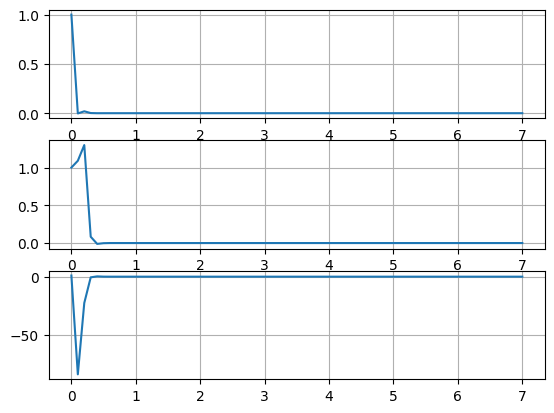

In [ ]:
Lc=ct.place(Ak.T,Ck.T,[0.8+.1j, 0.8-.1j, 0.5])

QN =np.diag([1, 1]);
RN =np.diag([0.4]);
L, P, E = ct.dlqe(Ak, Gk, Ck, QN, RN)
print(L)

eigenvalues, eigenvectors = np.linalg.eig(Ak-L@Ck)
print('Eigen values of A-LC matrix:',eigenvalues)

sys = ct.ss(Ak-Lc.T@Ck,[[0],[0],[0]],np.eye(3),0,dt)
T, yout =ct.initial_response(sys,np.linspace(0.0, 7.0, num=71),1)
fig, axs = plt.subplots(3, 1)
axs[0].grid()
axs[0].plot(T,yout[0]);
axs[1].plot(T,yout[1]);axs[1].grid()
axs[2].plot(T,yout[2]);axs[2].grid()

print(P)

#**Kalman Filtering**



## **Uncertininty propogation and Information fusion  of Gaussian distributions**




* The above LQE found an optimal constant gain to stabilize the error state model. Kalman filtering finds the optimal time varying gains $\mathbf{K}(t)$ to stabilize the error state model.

* The dynamic version of the observer ( with time varying gains) maintains an estimate of the state using a gaussian distribution, i.e., $x \sim \mathcal N(\hat{\mathbf{x}},P)$, where \mathbf{x}},P are the mean and the covariance of the state estimate.

* The observer performs two main functions to maintain an estimate of the current state $x$ which include
> 1.propogation of the gaussian distributions

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1cepBoUXzXzh3JBz4T1JTKwbooLxeGPiT"
    width="640"/>
</div>
</center>

> 2. fusion of gaussian distributions.

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1d4H2tAv8RvAaxdoxxlnm-i8rfcVxYtoz"
    width="640"/>
</div>
</center>

* The Kalman algorithm perfoms these two steps as follows:
<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=19mj8RYhoRVNqiptqy71dnbOsN6DUjafc"
    width="640"/>
</div>
</center>


>* **Prediction**: Use the mean and covariance of the current state estimate ($\bf \hat{x}_{k-1}, P_{k-1}$ ) and perform mean and uncertainity propogation using the system input $\bf u_k$ to find the predicted state estimate for the next time step ($\bf \hat{x}^-_{k}, P_{k}^-$ ).



>* **Correction**: When a measurement ($\bf \hat{y}_k, R_k$ ) is availble perform information fusion to combine the information available with the sensor reading with the predicted state estimate and output the optimal estimate of the state ($\bf \hat{x}_{k}, P_{k}$ )

*The two steps result in the following algorithm

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1g64Ga6O2XOXrHMrgoLcTAJq3U1yjoseP"
    width="640"/>
</div>
</center>


### **Example 1g)**
Write the Kalman predict function for the above system which takes the current state estimate, current covariance matrix as input and outputs the predicted state. The parameter is input to the funciton as a dictionary which has the $Ak,Bk,Gk,Ck,QN,RN,dt$ paramters of the model.

In [ ]:
# Write the predict function
def predict_1DINS(x_est,P_est,u,param):

  Ak = param['Ak'];Bk = param['Bk'];Gk = param['Gk'];QN = param['QN'];

  x_est = Ak@x_est + Bk@ u
  P_est = Ak @ P_est @ Ak.T + Gk @ QN @ Gk.T

  return x_est, P_est  # returns a tuple

### **Example 1h)**
Write the Kalman correct function for the above system which takes the current state estimate, current covariance matrix as input and outputs the predicted state. The parameter is input to the funciton as a dictionary which has the $Ak,Bk,Gk,Ck,QN,RN,dt$ paramters of the model.  

In [ ]:
# Write the correct function
def correct_1DINS(x_est,P_est,y,param):

  Ck = param['Ck'];RN = param['RN'];

  y_est = Ck @ x_est
  Sk = Ck @ P_est @ Ck.T + RN
  Ko = P_est @ Ck.T @ np.linalg.inv(Sk)
  P_est = (np.eye(3) - Ko @ Ck) @ P_est
  x_est = x_est + Ko @ (y - y_est)

  return x_est, P_est   # returns a tuple

Final position :  -0.13873172154748095  m




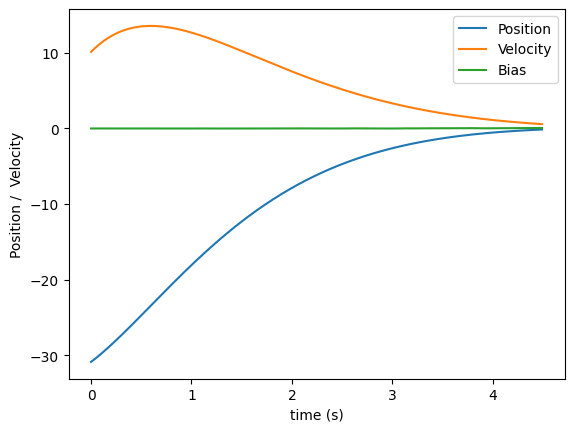

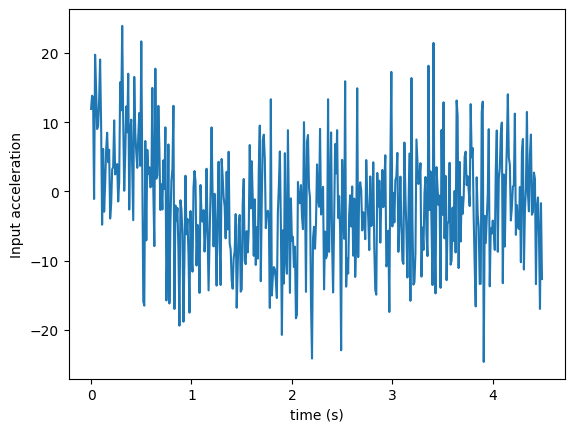

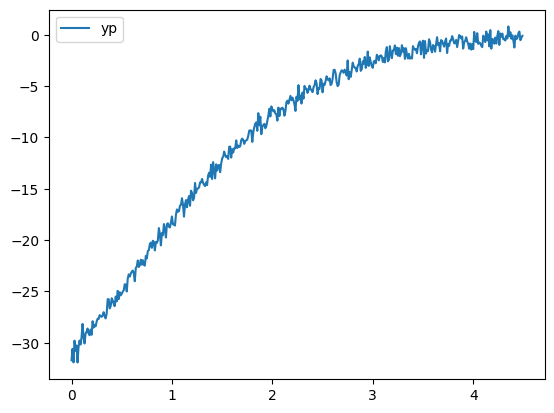

In [ ]:
#@title #**1D Inertial Navigation System Simulator**
#@markdown Right click to show or hide code
#@markdown This uses the above predict correct function
#@markdown and the Ak,Bk,Ck,Gk values

#@markdown ---

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from decimal import Decimal # to make modulo work

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)

# 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
dt = 0.01 ;
update_interval = 0.3 #@param {type:"number"}
sig_n_u = 0.5 ;

sig_n_v = 0.005;
t_end = 4.5;
sig_n_a =8 #@param {type:"number"}
sig_n_ba = 0.2 #@param {type:"number"}
sig_n_p = 0.5 #@param {type:"number"}
max_decel = 5 ;max_vel = 10.0  ; min_vel = 0.05  # Due to friction there is a minumum velocity that can be achieved
max_decel = 5 ;max_vel = 10.0  ; min_vel = 0.05; stopping_distance = -10
max_decel_act = max_decel  + abs(sig_n_u*np.random.randn()+0.3)
p0 = -31.0  #m
v0 = max_vel
ba0= 0
y_p0 = p0 + sig_n_p*np.random.randn()
y_v0 = v0 + sig_n_v*np.random.randn()
y_acc0 = 0 -ba0 + sig_n_a*np.random.randn()
eI=0
X = []; T= []; U =[]; Y=[]; E=[]; X_est=[];P_est=[];S_est=[];Y_est=[];# Variables for data acquisition

# these vectors are needed to define a system model
x = np.array([p0,v0,ba0]) # state vector - variables
x_est = np.array([p0+1,v0+1,ba0+1]) # state vector - variables
y = np.array([y_p0,y_v0]) # measurment vector - variables
param = {}  #we keep all parameters in a dictionary for ease of access
param['dt']= dt  # the parameter vector - constants

Kp = 0.4
Kd = 1.6
Ki = 0
Q = 1.0*np.eye(2)
R =  1.*np.identity(1)
Ak = np.array([[ 1.e+00,  1.e-02, -5.e-05],
              [ 0.e+00,  1.e+00, -1.e-02],
              [ 0.e+00,  0.e+00,  1.e+00]])
Bk = np.array([[5.e-05],
            [1.e-02],
            [0.e+00]])
Gk =np.array([[0, 0],[-1, 0],[0, 1]]) * dt
Ck = np.array([[1, 0, 0]])
QN =np.diag([sig_n_a**2, sig_n_ba**2]);
RN =np.diag([sig_n_p**2]);
param['Ak']= Ak; param['Bk']= Bk; param['Gk']= Gk; param['Ck']= Ck;
param['QN']= QN; param['RN']= RN;

# Model
Ac= np.array([[0, 1.0],[0, 0]])
Bc= np.array([[0], [1.0]]);
Klqrc, S, Ep = ct.lqr(Ac, Bc, Q,R)
Pk = np.eye(3)

i=0;

# 2. Simulation
for t in np.arange(0,t_end,dt):

  # LQR Controller stabilize at 0--------------------------------------
  u = -Klqrc @ (x[0:2]-np.array([0,0]))

  # READ CURRENT STATE X -----------------------------
  p = x[0]
  v = x[1]
  b_a = x[2]
  a = u.item()

  # SIMULATE Apply System model -----------------------------------------
  p = p + v*dt + 0.5*(a)*dt**2
  v = v + (a)*dt
  b_a = b_a + sig_n_ba*np.random.randn()*dt
  if v <= min_vel: # deadzone for velocity
    v=0.0

  # SIMULATE Apply Measurement model-----------------------------------------
  y_p = p + sig_n_p*np.random.randn()
  y_v = v + sig_n_v*np.random.randn()
  y_a = a - b_a + sig_n_a*np.random.randn()

  x = np.array([p,v,b_a])
  y = np.array([y_p,y_a])

  # OBSERVER  prediction --------------------------------
  x_est, Pk = predict_1DINS(x_est,Pk,[y[1]],param)
  #x_est = Ak@x_est + Bk@ [y[1]]
  #Pk = Ak @ Pk @ Ak.T + Gk @ QN @ Gk.T
  y_est = Ck @ x_est
  Sk = Ck @ Pk @ Ck.T + RN

  #OBSERVER correction --------------------------------
  if (Decimal(str(t)) % Decimal(str(update_interval)))<Decimal(dt*0.01)  : # update rate
    x_est, Pk = correct_1DINS(x_est,Pk,[y[0]],param)
    # Ko = Pk @ Ck.T @ np.linalg.inv(Sk)
    # Pk = (np.eye(3) - Ko @ Ck) @ Pk
    # x_est = x_est + Ko @ (y[0] - y_est)


  e = x - x_est

  #Data Aquisition
  X.append(x)
  X_est.append(x_est)
  T.append(t)
  Y.append([y[0]])
  Y_est.append(y_est)
  U.append(y_a)
  E.append(e)
  P_est.append(Pk)
  S_est.append(Sk)


# List to array conversion
P_est = np.array(P_est)
X_est = np.array(X_est)
X = np.array(X)
Y = np.array(Y)
E = X - X_est
S_est = np.array(S_est)
Y_est = np.array(Y_est)

#storing for monte carlo

# 4. visualization functions
# 4. visualization functions
print("Final position : ", x[0], " m")
fig1= plt.figure()
p = plt.plot(T, X)
plt.xlabel('time (s)')
plt.ylabel('Position /  Velocity')
plt.gca().legend(('Position','Velocity','Bias'))
print()

#fig1 = plt.figure()
#p = plt.plot(T, Y)

fig1 = plt.figure()
p = plt.plot(T, U)
plt.xlabel('time (s)')
plt.ylabel('Input acceleration')

fig1 = plt.figure()
p = plt.plot(T, Y)
plt.gca().legend(('yp','ya'))

print()

### **Example 1i)**

For the Kalman filter result generated in Exmp 1h, generated the following performance figures:

* Estimated and actual state vs time
* Error state vs time
* Log Error state vs time
* Measurement Residual vs time
* NEES vs time
* RMSE vs time

### *State vs Time*

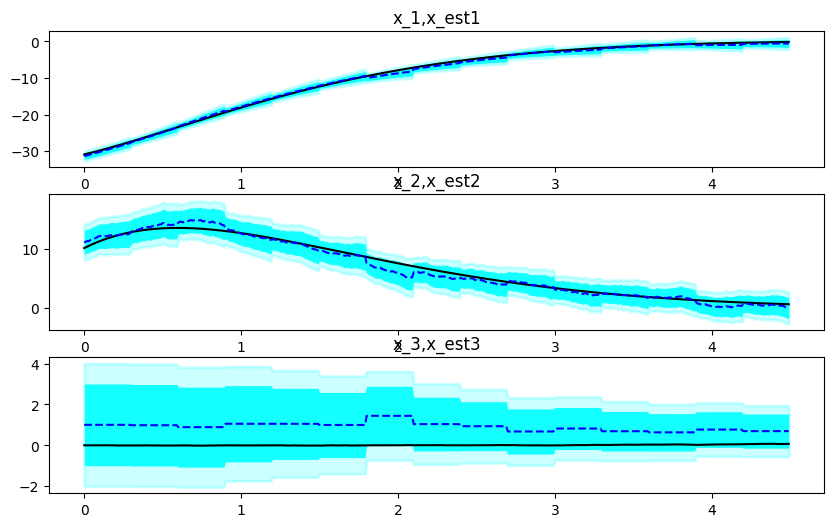

In [ ]:
fig, axs = plt.subplots(X.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(X.shape[1]):
  #axs[i].plot(T,X_est[:,i]+2*np.sqrt(P_est[:,i,i]),'b')
  axs[i].plot(T,X[:,i],color='black')
  axs[i].plot(T,X_est[:,i],'b--')
  #axs[i].plot(T,X_est[:,i]-2*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].set_title('x_'+ str(1+i) + ',x_est'+ str(1+i))
  axs[i].fill_between(T, X_est[:,i]-2*np.sqrt(P_est[:,i,i]),X_est[:,i]+2*np.sqrt(P_est[:,i,i]) ,
    alpha=0.9, edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, X_est[:,i]-3*np.sqrt(P_est[:,i,i]),X_est[:,i]+3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=2)

### *State error vs Time*

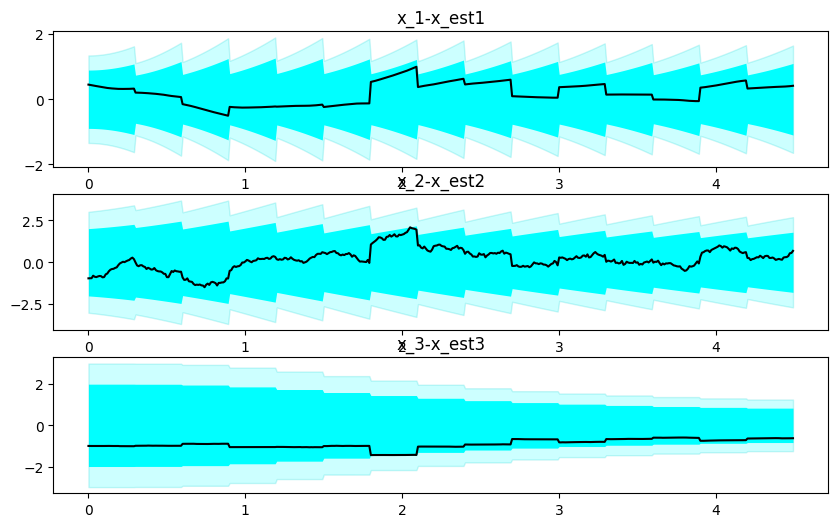

In [ ]:
fig, axs = plt.subplots(E.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(E.shape[1]):
  #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].plot(T,E[:,i],color='black')
  #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].fill_between(T, -2*np.sqrt(P_est[:,i,i]),2*np.sqrt(P_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, -3*np.sqrt(P_est[:,i,i]),3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
  axs[i].set_title('x_'+ str(1+i) + '-x_est'+ str(1+i))

### Log State error vs Time

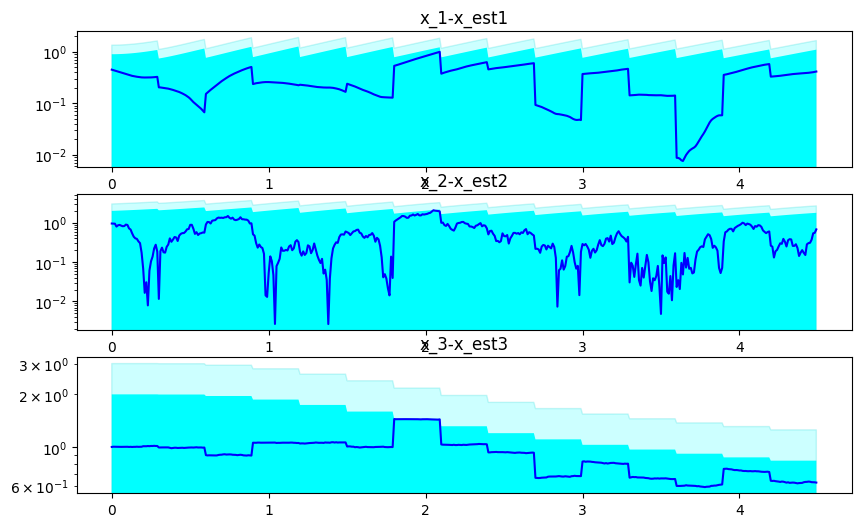

In [ ]:
fig, axs = plt.subplots(E.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(E.shape[1]):
  #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].semilogy(T,abs(E[:,i]),color='b')
  #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].fill_between(T, 0*np.sqrt(P_est[:,i,i]),2*np.sqrt(P_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, 0*np.sqrt(P_est[:,i,i]),3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
  axs[i].set_title('x_'+ str(1+i) + '-x_est'+ str(1+i))

### Innovation vs Time



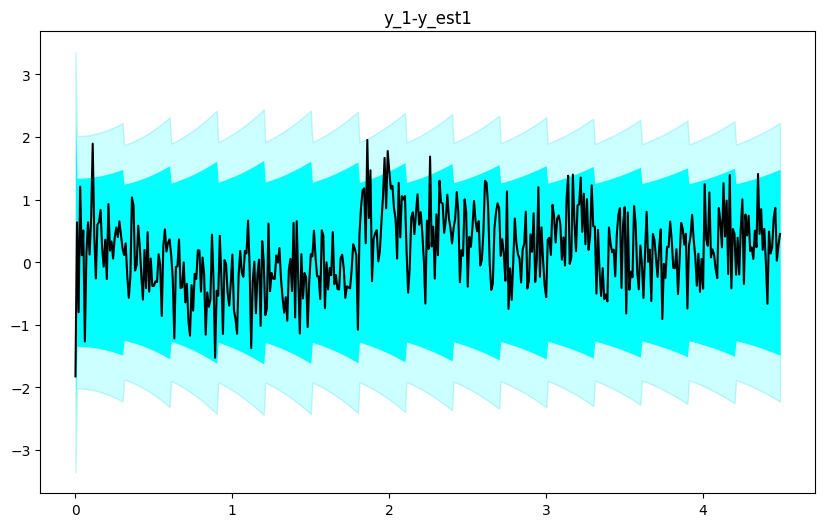

In [ ]:
fig, axs = plt.subplots(Y.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(Y.shape[1]):
  if Y.shape[1] == 1:
    #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
    axs.plot(T,Y[:,i]-Y_est[:,i],color='black')
    #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
    axs.fill_between(T, -2*np.sqrt(S_est[:,i,i]),2*np.sqrt(S_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
    axs.fill_between(T, -3*np.sqrt(S_est[:,i,i]),3*np.sqrt(S_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
    axs.set_title('y_'+ str(1+i) + '-y_est'+ str(1+i))
  else:
    #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
    axs[i].plot(T,Y[:,i]-Y_est[:,i],color='black')
    #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
    axs[i].fill_between(T, -2*np.sqrt(S_est[:,i,i]),2*np.sqrt(S_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
    axs[i].fill_between(T, -3*np.sqrt(S_est[:,i,i]),3*np.sqrt(S_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
    axs[i].set_title('y_'+ str(1+i) + '-y_est'+ str(1+i))

# **NEES - Normalized Estimation Error Squared**

Normalized estimation error squared checks if the estimated covariance and the actual error agrees with each other.

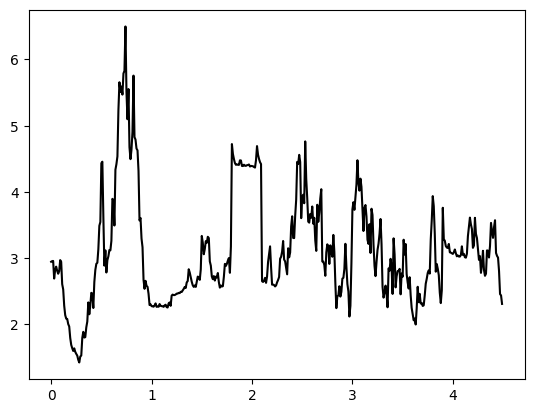

In [ ]:
NEES = []
for i in range(X.shape[0]):
  NEES.append(E[i,:].T @ np.linalg.inv(P_est[i,:,:]) @ E[i,:])

NEES = np.array(NEES)

fig1 = plt.figure()
plt.plot(T,NEES,color='black')

# **Monte Carlo Analysis**

A Monte Carlo analysis runs a simulation many times  whith smiulated random noise. This allows to see the reproducability of the performance and generate average performanse.

run:  0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.NEES :  1.1364036244981972
RMSE :  0.9740476280165639


Text(0, 0.5, 'Average RMSE')

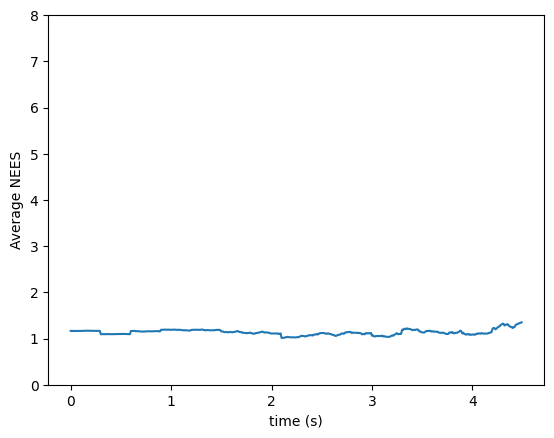

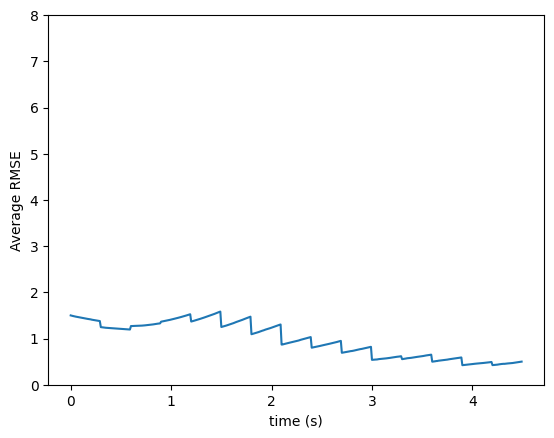

In [ ]:
#@title Monte carlo runs of the 1D INS
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)
mc_runs =30 #@param {type:"slider", min:1, max:50, step:1}

NEES = []; RMSE = [];
for mc in range(mc_runs):
    # 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
    dt = 0.01 ;sig_n_u = 0.5 ;sig_n_p = 0.5 ;sig_n_v = 0.005; t_end = 4.5; sig_n_a = 0.8; sig_n_ba = 0.2;
    max_decel = 5 ;max_vel = 10.0  ; min_vel = 0.05  # Due to friction there is a minumum velocity that can be achieved
    max_decel = 5 ;max_vel = 10.0  ; min_vel = 0.05; stopping_distance = -10
    max_decel_act = max_decel  + abs(sig_n_u*np.random.randn()+0.3)
    p0 = -31.0  #m
    v0 = max_vel
    ba0= 0
    y_p0 = p0 + sig_n_p*np.random.randn()
    y_v0 = v0 + sig_n_v*np.random.randn()
    y_acc0 = 0 -ba0 + sig_n_a*np.random.randn()
    eI=0
    X = []; T= []; U =[]; Y=[]; E=[]; X_est=[];P_est=[];S_est=[];Y_est=[];# Variables for data acquisition

    # these vectors are needed to define a system model
    x = np.array([p0,v0,ba0]) # state vector - variables
    x_est = np.array([p0+1,v0+1,ba0+1]) # state vector - variables
    y = np.array([y_p0,y_v0]) # measurment vector - variables
    param = {}  #we keep all parameters in a dictionary for ease of access
    param['dt']= dt  # the parameter vector - constants

    Kp = 0.4
    Kd = 1.6
    Ki = 0
    Q = 1.0*np.eye(2)
    R =  1.*np.identity(1)
    Ak = np.array([[ 1.e+00,  1.e-02, -5.e-05],
                  [ 0.e+00,  1.e+00, -1.e-02],
                  [ 0.e+00,  0.e+00,  1.e+00]])
    Bk = np.array([[5.e-05],
                [1.e-02],
                [0.e+00]])
    Gk =np.array([[0, 0],[-1, 0],[0, 1]]) * dt
    Ck = np.array([[1, 0, 0]])
    QN =np.diag([sig_n_a**2, sig_n_ba**2]);
    RN =np.diag([sig_n_p**2]);
    param['Ak']= Ak; param['Bk']= Bk; param['Gk']= Gk; param['Ck']= Ck;
    param['QN']= QN; param['RN']= RN;

    # Model
    Ac= np.array([[0, 1.0],[0, 0]])
    Bc= np.array([[0], [1.0]]);
    Klqrc, S, Ep = ct.lqr(Ac, Bc, Q,R)
    Pk = np.eye(3)

    i=0;

    # 2. Simulation
    for t in np.arange(0,t_end,dt):

      # LQR Controller stabilize at 0--------------------------------------
      u = -Klqrc @ (x[0:2]-np.array([0,0]))

      # READ CURRENT STATE X -----------------------------
      p = x[0]
      v = x[1]
      b_a = x[2]
      a = u.item()

      # SIMULATE Apply System model -----------------------------------------
      p = p + v*dt + 0.5*(a)*dt**2
      v = v + (a)*dt
      b_a = b_a + sig_n_ba*np.random.randn()*dt
      if v <= min_vel: # deadzone for velocity
        v=0.0

      # SIMULATE Apply Measurement model-----------------------------------------
      y_p = p + sig_n_p*np.random.randn()
      y_v = v + sig_n_v*np.random.randn()
      y_a = a - b_a + sig_n_a*np.random.randn()

      x = np.array([p,v,b_a])
      y = np.array([y_p,y_a])

      # OBSERVER  prediction --------------------------------
      x_est, Pk = predict_1DINS(x_est,Pk,[y[1]],param)
      #x_est = Ak@x_est + Bk@ [y[1]]
      #Pk = Ak @ Pk @ Ak.T + Gk @ QN @ Gk.T
      y_est = Ck @ x_est
      Sk = Ck @ Pk @ Ck.T + RN

      #OBSERVER correction --------------------------------
      if (Decimal(str(t)) % Decimal(str(0.3)))<Decimal(dt*0.01)  : # update rate
        x_est, Pk = correct_1DINS(x_est,Pk,[y[0]],param)
        # y_est = Ck @ x_est
        # Sk = Ck @ Pk @ Ck.T + RN
        # Ko = Pk @ Ck.T @ np.linalg.inv(Sk)
        # Pk = (np.eye(3) - Ko @ Ck) @ Pk
        # x_est = x_est + Ko @ (y[0] - y_est)


      e = x - x_est

      #Data Aquisition
      X.append(x)
      X_est.append(x_est)
      T.append(t)
      Y.append([y[0]])
      Y_est.append(y_est)
      U.append(u)
      E.append(e)
      P_est.append(Pk)
      S_est.append(Sk)
      NEES.append(1/e.shape[0]*e.T @ np.linalg.inv(Pk) @ e)
      RMSE.append(np.linalg.norm(e))

    # List to array conversion
    P_est = np.array(P_est)
    X_est = np.array(X_est)
    X = np.array(X)
    Y = np.array(Y)
    E = X - X_est
    S_est = np.array(S_est)
    Y_est = np.array(Y_est)

    if mc == 0:
      print('run: ',mc, end ='.')
    else:
      print(mc, end ='.')


#storing for monte carlo
NEES = np.array(NEES)
NEES=NEES.reshape(mc+1,int(NEES.shape[0]/(mc+1)))
avgNEES = NEES.mean(0)

RMSE = np.array(RMSE)
RMSE=RMSE.reshape(mc+1,int(RMSE.shape[0]/(mc+1)))
avgRMSE = RMSE.mean(0)

print('NEES : ', avgNEES.mean(0))
print('RMSE : ', avgRMSE.mean(0))

fig1 = plt.figure()
p = plt.plot(T, avgNEES)
plt.ylim(0, 8)
plt.xlabel('time (s)')
plt.ylabel('Average NEES')

fig1 = plt.figure()
p = plt.plot(T, avgRMSE)
plt.ylim(0, 8)
plt.xlabel('time (s)')
plt.ylabel('Average RMSE')

# **Sensor Sources of Error**


* There are several sources of errors that can corrupt sensor measurements. Common sources include sensor noise, sensor outliers, sensor anomolies, sensor calibration errors etc.

* We handled **sensor noise** by modeling it as a Gaussain noise distribution in the measurement model.

* In navigation system design, **sensor calibration** is given careful consideration. A wrong calibration makes the measurements no longer following the mathematical description defined by the model. Examples:

> 1. The **transformation frames** attached to each camera, LiDAR, inertial measurement unit are carefullly figured out prior to implementing navigation systems.  
> 1. **Sensitivities and biases** of accelerometers, gyroscopes, magnetometers are captured correctly for each sensor from manufacturer datasheets.
>1. **Moving biases** similar to accelerometer and gyroscope bias are captured using random walk processes.
> 1.Sensors used for precise measurements such as cameras are calibrated using standardized **parameter calibration** procedures to establish deviations from manufacturere provided parameters for focal lengths, lense distortions, capture delays.

* **Sensor anomalies** that occur due to sensor failuire and degradation is commonly handled using **sensor redundancy** ( having multiple similar sensors) and  **anomaly detection** machine learning systems which periodically review readings from sensors to flag any faulty sensor sources.

* In some cases the anomaly source is not due to the sensor but due to the environment the robot is operating in, i.e., **enviromental anomalies**.

* For example **Magnetic anomalies** skew the magnetometer readings when operating near external magnetic fields or depending on the particular location.

* Another example is **GPS reading anomalies** which can occur due to multipath effects in an environment or GPS spoofing scenarios.

* These enviromental anomalies would require a anomaly detection system that takes in multiple diverse sensor sources to establish the sources which are not in agreement with each other.

* For example magnetic heading is compared with GPS heading and gyroscope heading rate. Thus **redundancy in sensing** and **diversity in sensing** are key to achieving robustness against sensor anomalies.



# **Outlier Rejection**

* In some cases the reading recieved by a sensor is outside the expected range of values for the current state, i.e., an outlier. This can be due to calibration errors or due to a degrading sensor.

* Although the navigation system desing should ensure correct calibration parameter use and anomaly detectors flaging corrupted data, it is often the case that corrupted readings (outliers) make its way to the state estimator.

* Kalman filters and state estimators in general performs a process termed **measurement gating** to discard such outliers from being used in the correction step.

## **Measurement Gating**
* In measurement gating the Kalman filter uses the confidence limits of the predicted measurement $\hat{y}$.

* The confidence limits can be established using measurement estimate covariance $S$ that is maintained by the Kalaman Filter.


### Mahalanobis Distance

* When measuring the difference between two vectors the the geometric distance can be used. However if those two measurements have different covariances th  geometric distance should be adjusted to account for the uncertainities.

* The Mahalonobis distance accounts for the measured and estimated readings.


* The  measurement gating algorithm is as follows:
> If $d^2 < \chi^2_{1-0.95,\nu}$
>>Perform Kalman State and Covariance Correction

* Here $d^2$ is the Mahalanobis distance calculated using the measurement error (innovation) and the measurement covariance $S$ of the filter.

$$d ^2 = \tilde{y}S^{-1}\tilde{y}^T$$

* The Mahalonobis distance squared caculation effectively normalizes the error to have a variance of 1.

* The threshold $\chi^2_{1-0.95,\nu}$ finds the 95\% condfidence threshold for the normalized error accounting for the dimension of the measurement vector $dim(y)$ which is used as the degree of freedom $\nu$. E.g. for a 1 dimensional gaussain distribution the 95% confidence value is $1.96\sigma \Rightarrow \chi^2_{1-0.95,1}=1.96^2$ using table: (https://statisticsbyjim.com/hypothesis-testing/chi-square-table/)






# **Data Association**

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1HBaYpA-eNpcW-_dofWjMTovJ_bxeEq50"
    width="440"/>
</div>
</center>

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1IzkMDDip4j0dH4bYFPUNR77fUqzYJUA7"
    width="440"/>
</div>
</center>

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=19TZhsLGsxEfNfm0CSM_kkomnKsYu6bP3"
    width="440"/>
</div>
</center>


## Nearest Neighbour

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1oDtX2q9FtpXXqflAZjJrVx81V1EcVg7D"
    width="440"/>
</div>
</center>

## Global Nearest Neighbour
%hungarian algorithm

https://www.hungarianalgorithm.com/examplehungarianalgorithm.php

https://thinkautonomous.medium.com/computer-vision-for-tracking-8220759eee85

## Multi Hypothesis Tracking
Maintains multiple state estimates for possible detection and measurement matching pairs.


## Data association and linear Kalman filters in action

### Radar target tracking

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1oDtX2q9FtpXXqflAZjJrVx81V1EcVg7D"
    width="440"/>
</div>
</center>

### Lidar target tracking

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1-a27LccXgPA6Jh8mlJwfiAp3_eogqaDw"
    width="440"/>
</div>
</center>

### Visual target tracking

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1s4vZA19JzJOOKwL7-LjdF-bPZyK7lia_"
    width="440"/>
</div>
</center>

% Deep sort

https://nanonets.com/blog/object-tracking-deepsort/

% Victoria park SLAM

https://www.youtube.com/watch?v=Kz7dmGrOfbM



# **Exercise 1**
Consider the following system model used for tracking of objects in an image. The state estimator tracks the buonding box relevant to the object.  The state vector is $[p_x~p_y ~w ~h~ v_x~ v_y ~v_w~ v_h]^T$ where $p_x,p_y$ are the x and y cordinates of the bonding box centroid, $w,h$ are the width and height of the bounding box representing the object,  $v_x~ v_y$ are the velocities of the bounding box center,  $v_w~ v_h$ are the velocities of the bounding box dimensions. The velocities $v_x,~ v_y,~v_w,~ v_h$ are modeled as random walk processes with noise variables $\eta_{vx},~ \eta_{vy},~ \eta_{vw},~ \eta_{vh}\sim\mathcal N(0,0.1^2)$. A YOLO detector running on the image outputs the centroid cordinates $y_{px}, ~ y_{py}$ and width, height dimension $y_{w}, ~ y_{h}$ of the bonding box corresponding to the tracked object with noises $\eta_{px},~ \eta_{py},~ \eta_{w},~ \eta_{h}\sim\mathcal N(0,0.1^2)$ respectively.



### **Exercise 1a)**
Write the system ane measuremnt model for the tracker introduced above.



### **Exercise 1b)**
Comment on the observability and the detectability of the system

In [ ]:
!pip install control
import numpy as np
import control as ct

### **Exercise 1c)**
Discretize the system using a sampling time dt = 0.1 s,and Write the $Ak,Bk,Gk,Ck,QN,RN$ matrices for the system.

### **Exercise 1d)**
A linear state observer for the above system takes the form
 \begin{equation}
 \begin{array}{l l}
\mathbf{\hat{x}}_{k+1} &=\mathbf{A_k}\mathbf{\hat{x}}_k+\mathbf{B_k}\mathbf{u}_k + \mathbf{K }(\mathbf{y} _k-\mathbf{\hat{y}} _k)\\
\mathbf{\hat{y}} _k        &=\mathbf{C_k\hat{x}}_k
\end{array}
\end{equation}
where $\hat{\mathbf{x}}$ is used to denote the estimate of a variable $\mathbf{x}$. Taking the error state as $ \tilde{\mathbf{x}}= \mathbf{x}-\hat{\mathbf{x}}$, generate the equation for error state dynamics $\mathbf{\tilde{x}_{k+1}}$ for this system. What are the necessary conditions for this error state system to be asymptotically stable?

### **Exercise 1e)**
Write the Kalman predict function for the above system which takes the current state estimate, current covariance matrix as input and outputs the predicted state. The parameter is input to the funciton as a dictionary which has the $A_k,G_k,C_k,Q_N,R_N,dt$ paramters of the model. Note that theres no $B_k$ matrix for this model as it is driven by noise.

In [ ]:
# Write the predict function
def predict_YOLOtracker(x_est,P_est,param):

  #WRITE YOUR CODE HERE

  return x_est, P_est  # returns a tuple


### **Exercise 1f)**
Write the Kalman correct function for the above system which takes the current state estimate, current covariance matrix as input and outputs the predicted state. The parameter is input to the funciton as a dictionary which has the $Ak,Gk,Ck,QN,RN,dt$ paramters of the model.  Note that theres no $B_k$ matrix for this model as it is driven by noise.



In [ ]:
# Write the correct function
#from scipy.stats.distributions import chi2
chi2inv95 = {
    1: 3.8415,
    2: 5.9915,
    3: 7.8147,
    4: 9.4877,
    5: 11.070,
    6: 12.592,
    7: 14.067,
    8: 15.507,
    9: 16.919}

def correct_YOLOtracker(x_est,P_est,y,param):

  # WRITE YOUR CODE HERE
  return x_est, P_est   # returns a tuple

### **Exercise 1g)**
Modify the above function to perform measurement gating using a $95\%$ acceptance criteria for the degrees of freedom of the measurement vector dimention.


### **Exercise 1h)**
Run the following code to generate the Kalman filtering results. Select the number of Monte Carlo runs




Outlier injected @  3.6
Outlier injected @  21.9
Outlier injected @  34.2
Outlier injected @  39.3
Outlier injected @  40.5
run:  0.NEES :  25.966622122275215
RMSE :  18.30150270802858
Estimated State and Actual State vs Time
Estimated error state vs Time


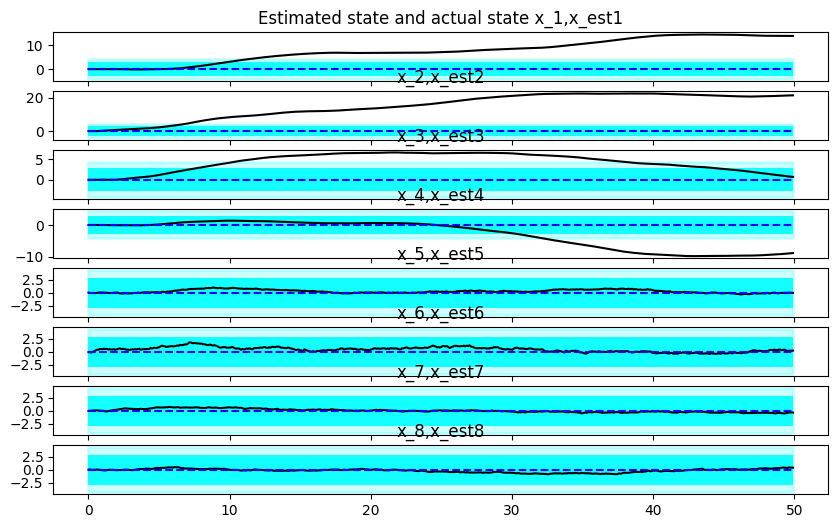

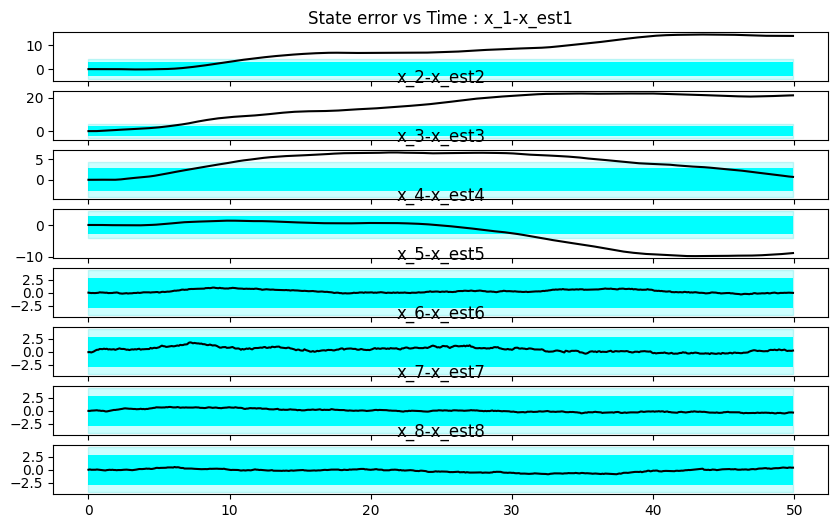

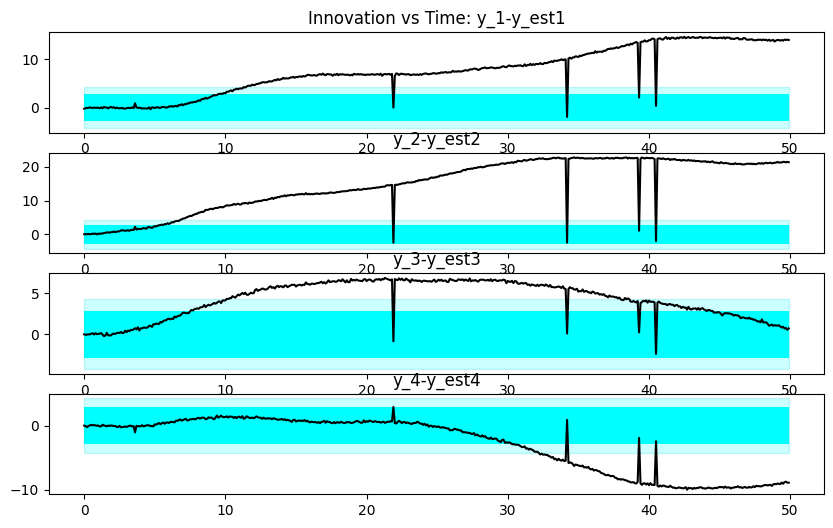

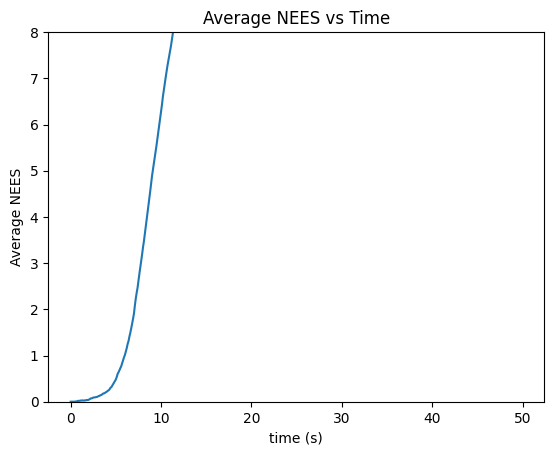

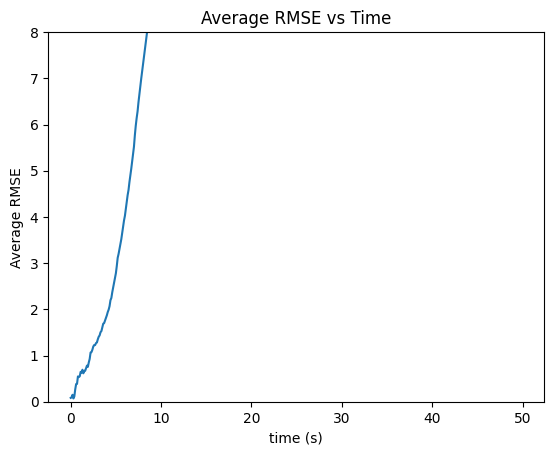

In [ ]:
#@title Monte carlo runs of the YOLO Tracker
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
from numpy import random
from decimal import Decimal # to make modulo work
from scipy.linalg import expm

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)
mc_runs =1 #@param {type:"slider", min:1, max:50, step:1}

NEES = []; RMSE = [];
for mc in range(mc_runs):
    # 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
    dt = 0.1 ;
    sig_n_x=0.1; sig_n_y=0.1; sig_n_w=0.1; sig_n_h=0.1;
    sig_n_vx=0.4; sig_n_vy=0.4; sig_n_vw=0.4; sig_n_vh=0.4;


    # The state space model
    A= np.array([[0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

    # there is no B matrix
    C= np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0]]);

    # there is no D matrix

    Gw= np.array([[0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]]);
    Bk = np.array([0])
    Phi = expm(np.block([[A, Gw], [np.zeros([Gw.shape[1],A.shape[1]+Gw.shape[1]])]])*dt)
    Ak  = Phi[0:A.shape[0],0:A.shape[1]]
    Gk  = Phi[0:A.shape[1],A.shape[1]:A.shape[1]+Gw.shape[0]]
    Ck  = C

    QN =np.diag([sig_n_vx**2, sig_n_vy*2, sig_n_vw**2, sig_n_vh**2]);
    RN =np.diag([sig_n_x**2, sig_n_y**2, sig_n_w**2, sig_n_h**2]);
    param = {}  #we keep all parameters in a dictionary for ease of access
    param['dt']= dt  # the parameter vector - constants
    param['Ak']= Ak; param['Bk']= Bk; param['Gk']= Gk; param['Ck']= Ck;
    param['QN']= QN; param['RN']= RN;




    X = []; T= []; Y=[]; E=[]; X_est=[];P_est=[];S_est=[];Y_est=[];# Variables for data acquisition

    # these vectors are needed to define a system model
    x = np.array([0,0,0,0,0,0,0,0]) # state vector - variables
    x_est = x #np.array([1.,1.,1.,1.,1.,1.,1.,1.]) # state vector - variables
    y = Ck @ x + np.sqrt(RN) @ np.random.randn(RN.shape[0])
    Pk = 2*np.eye(Ak.shape[0])

    i=0;
    t_end=50

    # 2. Simulation
    for t in np.arange(0,t_end,dt):


      # SIMULATE Apply System model -----------------------------------------
      x = Ak @ x + Gk @ np.sqrt(QN) @ np.random.randn(QN.shape[0])


      # SIMULATE Apply Measurement model-----------------------------------------
      y = Ck @ x + np.sqrt(RN) @ np.random.randn(RN.shape[0])

      #  y= y  + 10*np.random.randn(RN.shape[0])


      # OBSERVER  prediction --------------------------------
      x_est, Pk = predict_YOLOtracker(x_est,Pk,param)
      #x_est = Ak@x_est
      #Pk = Ak @ Pk @ Ak.T + Gk @ QN @ Gk.T
      y_est = Ck @ x_est
      Sk = Ck @ Pk @ Ck.T + RN

      #OBSERVER correction --------------------------------
      if (Decimal(str(t)) % Decimal(str(0.3)))<Decimal(dt*0.01)  : # update rate
        if random.poisson(lam=2, size=1)>5 :
          y= np.random.uniform(-3.,3.,4)
          print("Outlier injected @ ",np.round(t,1))
        x_est, Pk = correct_YOLOtracker(x_est,Pk,y,param)
        #y_est = Ck @ x_est
        #Sk = Ck @ Pk @ Ck.T + RN
        #Ko = Pk @ Ck.T @ np.linalg.inv(Sk)
        #Pk = (np.eye(Ak.shape[0]) - Ko @ Ck) @ Pk
        #x_est = x_est + Ko @ (y - y_est)


      e = x - x_est

      #Data Aquisition
      X.append(x)
      X_est.append(x_est)
      T.append(t)
      Y.append(y)
      Y_est.append(y_est)
      E.append(e)
      P_est.append(Pk)
      S_est.append(Sk)
      NEES.append(1/e.shape[0]*e.T @ np.linalg.inv(Pk) @ e)
      RMSE.append(np.linalg.norm(e))

    # List to array conversion
    P_est = np.array(P_est)
    X_est = np.array(X_est)
    X = np.array(X)
    Y = np.array(Y)
    E = X - X_est
    S_est = np.array(S_est)
    Y_est = np.array(Y_est)

    if mc == 0:
      print('run: ',mc, end ='.')
    else:
      print(mc, end ='.')


#storing for monte carlo
NEES = np.array(NEES)
NEES=NEES.reshape(mc+1,int(NEES.shape[0]/(mc+1)))
avgNEES = NEES.mean(0)

RMSE = np.array(RMSE)
RMSE=RMSE.reshape(mc+1,int(RMSE.shape[0]/(mc+1)))
avgRMSE = RMSE.mean(0)

print('NEES : ', avgNEES.mean(0))


print('RMSE : ', avgRMSE.mean(0))


print('Estimated State and Actual State vs Time')
fig, axs = plt.subplots(X.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(X.shape[1]):
  #axs[i].plot(T,X_est[:,i]+2*np.sqrt(P_est[:,i,i]),'b')
  axs[i].plot(T,X[:,i],color='black')
  axs[i].plot(T,X_est[:,i],'b--')
  #axs[i].plot(T,X_est[:,i]-2*np.sqrt(P_est[:,i,i]),color='blue')
  if i==0:
    axs[i].set_title('Estimated state and actual state x_'+ str(1+i) + ',x_est'+ str(1+i))
  else:
    axs[i].set_title('x_'+ str(1+i) + ',x_est'+ str(1+i))
  axs[i].fill_between(T, X_est[:,i]-2*np.sqrt(P_est[:,i,i]),X_est[:,i]+2*np.sqrt(P_est[:,i,i]) ,
    alpha=0.9, edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, X_est[:,i]-3*np.sqrt(P_est[:,i,i]),X_est[:,i]+3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=2)

print('Estimated error state vs Time')
fig, axs = plt.subplots(E.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(E.shape[1]):
  #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].plot(T,E[:,i],color='black')
  #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].fill_between(T, -2*np.sqrt(P_est[:,i,i]),2*np.sqrt(P_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, -3*np.sqrt(P_est[:,i,i]),3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
  if i==0:
    axs[i].set_title('State error vs Time : x_'+ str(1+i) + '-x_est'+ str(1+i))
  else:
    axs[i].set_title('x_'+ str(1+i) + '-x_est'+ str(1+i))


fig, axs = plt.subplots(Y.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(Y.shape[1]):
  if Y.shape[1] == 1:
    #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
    axs.plot(T,Y[:,i]-Y_est[:,i],color='black')
    #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
    axs.fill_between(T, -2*np.sqrt(S_est[:,i,i]),2*np.sqrt(S_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
    axs.fill_between(T, -3*np.sqrt(S_est[:,i,i]),3*np.sqrt(S_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
    axs.set_title('Innovation vs Time:y_'+ str(1+i) + '-y_est'+ str(1+i))
  else:
    #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
    axs[i].plot(T,Y[:,i]-Y_est[:,i],color='black')
    #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
    axs[i].fill_between(T, -2*np.sqrt(S_est[:,i,i]),2*np.sqrt(S_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
    axs[i].fill_between(T, -3*np.sqrt(S_est[:,i,i]),3*np.sqrt(S_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
    if i==0:
      axs[i].set_title('Innovation vs Time: y_'+ str(1+i) + '-y_est'+ str(1+i))
    else:
      axs[i].set_title('y_'+ str(1+i) + '-y_est'+ str(1+i))


fig1 = plt.figure()
p = plt.plot(T, avgNEES);
plt.ylim(0, 8)
plt.xlabel('time (s)')
plt.ylabel('Average NEES')
plt.title('Average NEES vs Time');

fig1 = plt.figure()
p = plt.plot(T, avgRMSE)
plt.ylim(0, 8)
plt.xlabel('time (s)')
plt.ylabel('Average RMSE');
plt.title('Average RMSE vs Time');

### **Exercise 1i)**
Looking at the state error propogation comment on the consistency of estimation of the model

### **Exercise 1j)**
Looking at the measurement error and uncertainity plots, comment on the consistency of the measurement prediction, and existance of any outliers in the tracking. ( try changing the outlier rejection function and see how well the rejection works)



### **Exercise 1k)**
Comment on what happens if multiple targets are there to be tracked, and there are multiple detections that fall within a measurement gate.